In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math
import pandas as pd

# Utils

In [2]:
def imshow(*args, figsize=10, to_rgb=True, title=None, fontsize=12):
    if isinstance(figsize, int):
        figsize = (figsize, figsize)
    images = args[0] if type(args[0]) is list else list(args)
    if to_rgb:
        images = list(map(lambda x: cv2.cvtColor(x, cv2.COLOR_BGR2RGB), images))
    if title is not None:
        assert len(title) == len(images), "Please provide a title for each image."
    plt.figure(figsize=figsize)
    for i in range(1, len(images)+1):
        plt.subplot(1, len(images), i)
        if title is not None:
            plt.title(title[i-1], fontsize=fontsize)
        plt.imshow(images[i-1], cmap = 'gray')
        plt.xticks([]), plt.yticks([])

In [3]:
def plot_image(image, nth, title, row = 1):
  plt.subplot(row, 5, nth)
  plt.imshow(image, cmap='gray')
  plt.subplots_adjust(right=3.5, wspace=0.1)
  plt.title(title)
  plt.xticks([]), plt.yticks([])

In [4]:
def pad(f,p,q):
  m,n = f.shape
  fp = np.zeros((p,q))
  fp[0:m,0:n]=f
  return fp

In [5]:
def plot_image(image, nth, title, row = 1):
  plt.subplot(row, 5, nth)
  plt.imshow(image, cmap='gray')
  plt.subplots_adjust(right=3.5, wspace=0.1)
  plt.title(title)

# Filters

In [6]:
def fourier_transform(image, shift=True):
    ftt = np.fft.fft2(image)
    if(shift):
      ftt = np.fft.fftshift(ftt)
    return ftt

In [7]:
def fourier_magnitude(fft, log=False):
    magnitude = np.abs(fft)
    if(log):
      magnitude = np.log(1+magnitude) #use log to show better
    return magnitude

In [8]:
def fourier_phase(fft):
    return np.angle(fft)

In [9]:
def inverse_fourier_transform(dft):
    return np.fft.ifft2(dft)

# Practice 4.1

## practice 4.1.1

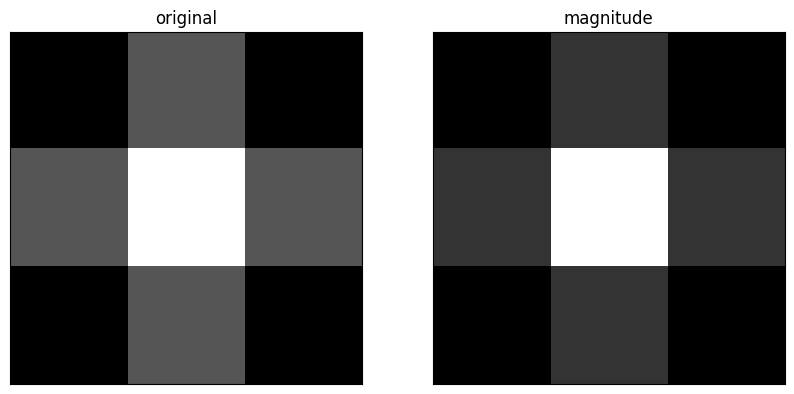

In [10]:
a_filter = np.array(([[1, 2, 1], [2, 4, 2], [1, 2, 1]]))/16
af1 = np.array([[1,2,1]])
af2 = np.array([[1],[2],[1]])

a_ftt = fourier_transform(a_filter)
a_magnitude = fourier_magnitude(a_ftt)

imshow(a_filter, a_magnitude, title=["original", "magnitude"], to_rgb=False)

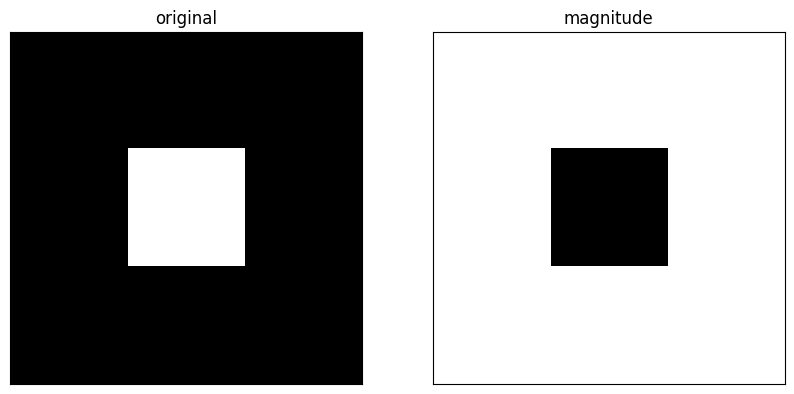

In [11]:
b_filter = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])

b_ftt = fourier_transform(b_filter)
b_magnitude = fourier_magnitude(b_ftt)

imshow(b_filter, b_magnitude, title=["original", "magnitude"], to_rgb=False)

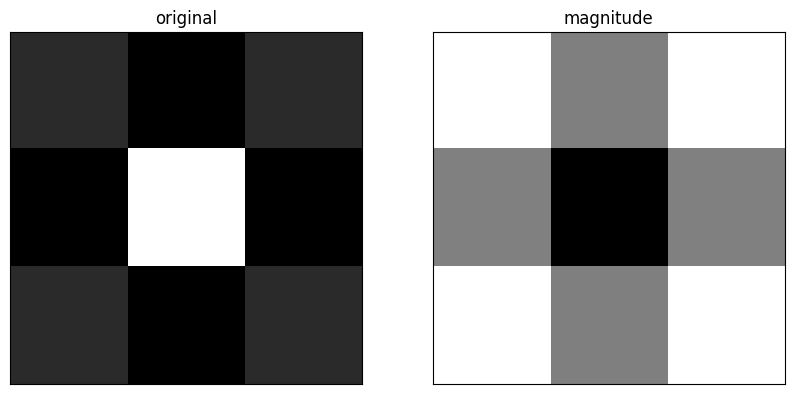

In [12]:
c_filter = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
cf1 = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])

c_ftt = fourier_transform(c_filter)
c_magnitude = fourier_magnitude(c_ftt)

imshow(c_filter, c_magnitude, title=["original", "magnitude"], to_rgb=False)

In [13]:
def DFT_with_filter(f,h):
  # step1: calculate p, q by m and n
  # p = 2*m , q = 2*n
  m,n = f.shape
  p=2*m
  q=2*n

  # step2: construct fp by adding 0 to f(image)
  fp = pad(f,p,q)

  # step3: DFT
  F = fourier_transform(fp)
  F_mag = fourier_magnitude(F, True)
  F_phase = fourier_phase(F)[0:m,0:n] # phase of image is in the top right quarter

  # calculate fourier on filter
  hp= pad(h,p,q)
  H = fourier_transform(hp)
  H_mag = fourier_magnitude(H, True)

  imshow(f, fp, F_mag, F_phase, H_mag, title=["F(image)","F Padded", "F Magnitude","F Phase", "H(filter) Magnitude"], to_rgb=False)
  plt.show()

  return F, H

In [14]:
def apply_filter(f,h):
  F,H = DFT_with_filter(f,h)
  # step4: apply filter by matrix multiplition
  G = F*H
  G_mag = fourier_magnitude(G, True)

  # step5: gp = Decentralized IFFT
  gp = np.fft.ifftshift(G)
  gp_mag = fourier_magnitude(gp, True)

  # # reverse image
  g = np.fft.ifft2(gp)

  # # step6: crop image
  g_crop = np.abs(g[0:512 , 0:512])

  imshow(G_mag, gp_mag, g_crop, title=["Magnitude of G = F * H", "Decentralized IFFT","Reversed Image"], to_rgb=False)


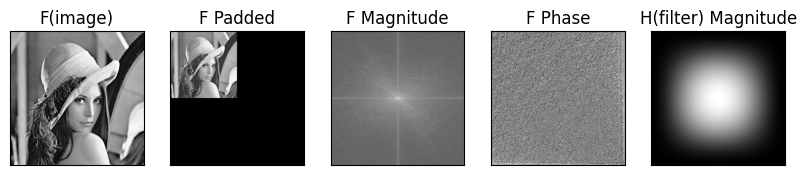

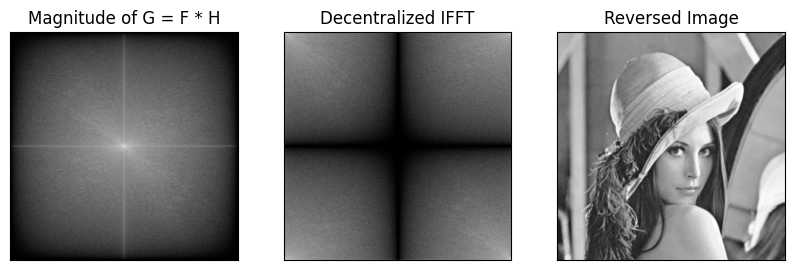

In [15]:
lena = cv2.imread('Lena.bmp', cv2.IMREAD_GRAYSCALE)
g1 = apply_filter(lena, a_filter)

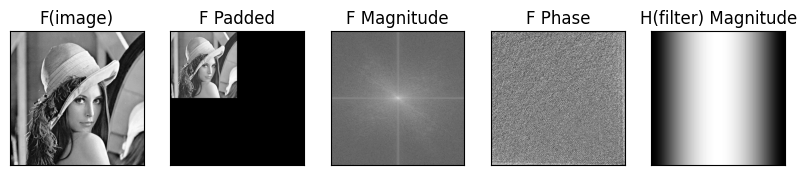

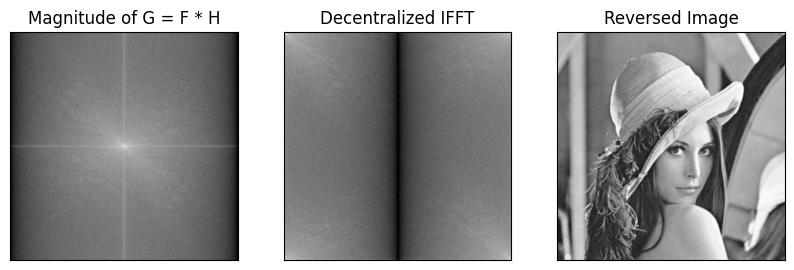

In [16]:
g11 = apply_filter(lena, af1)

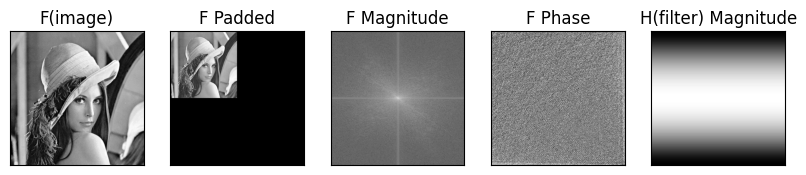

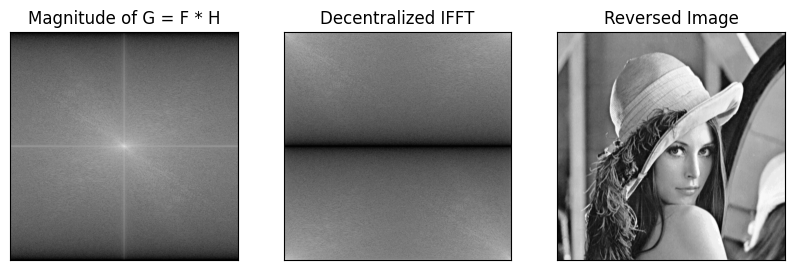

In [17]:
g12 = apply_filter(lena, af2)

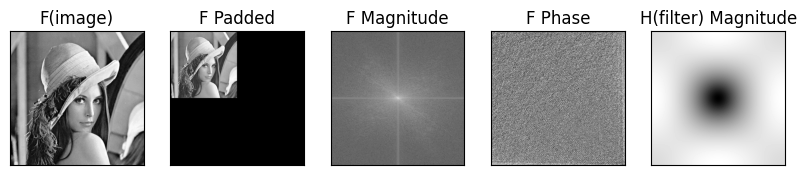

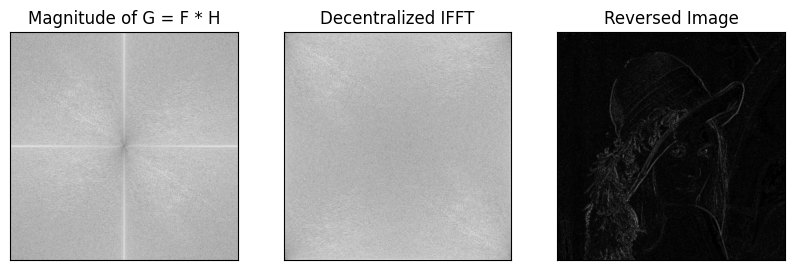

In [18]:
g2 = apply_filter(lena, b_filter)

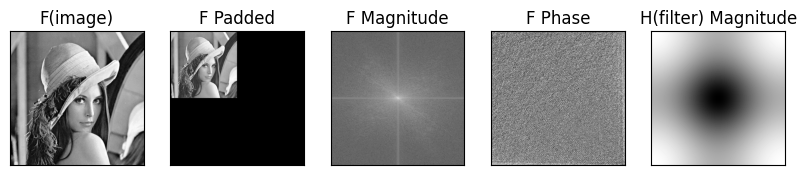

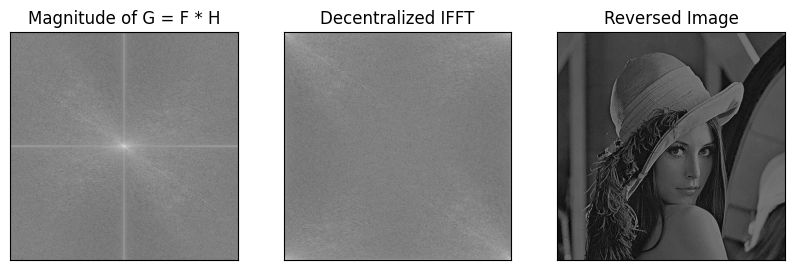

In [19]:
g3 = apply_filter(lena, c_filter)

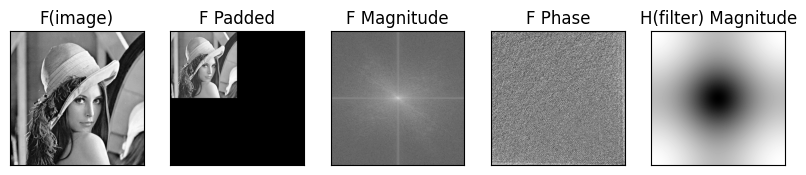

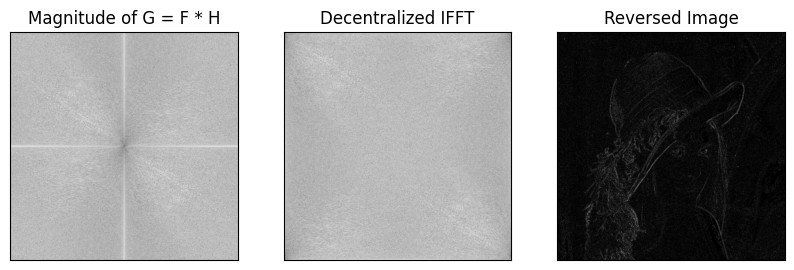

In [20]:
g31 = apply_filter(lena, cf1)

## practice 4.1.2


In [21]:
def DFT(f):
  m,n = f.shape
  p=2*m
  q=2*n

  fp = pad(f,p,q)

  F_unshifted = fourier_transform(f, False)
  F_shifted = fourier_transform(f)

  return F_shifted, F_unshifted


In [22]:
def log_DFT(F_shifted, F_unshifted):
    # Mag with shift
    FSM = fourier_magnitude(F_shifted)
    plot_image(FSM,1,"Mag with shif and log")

    # Mag with shif and log
    FSML = fourier_magnitude(F_shifted, True)
    plot_image(FSML,2,"Mag with shift")

    # Mag with log
    FML = np.log(1+np.abs(F_unshifted))
    FML = fourier_magnitude(F_unshifted, True)
    plot_image(FML,3,"Mag with log")

    # Mag
    FM = fourier_magnitude(F_unshifted)
    plot_image(FM,4,"Magnitude")


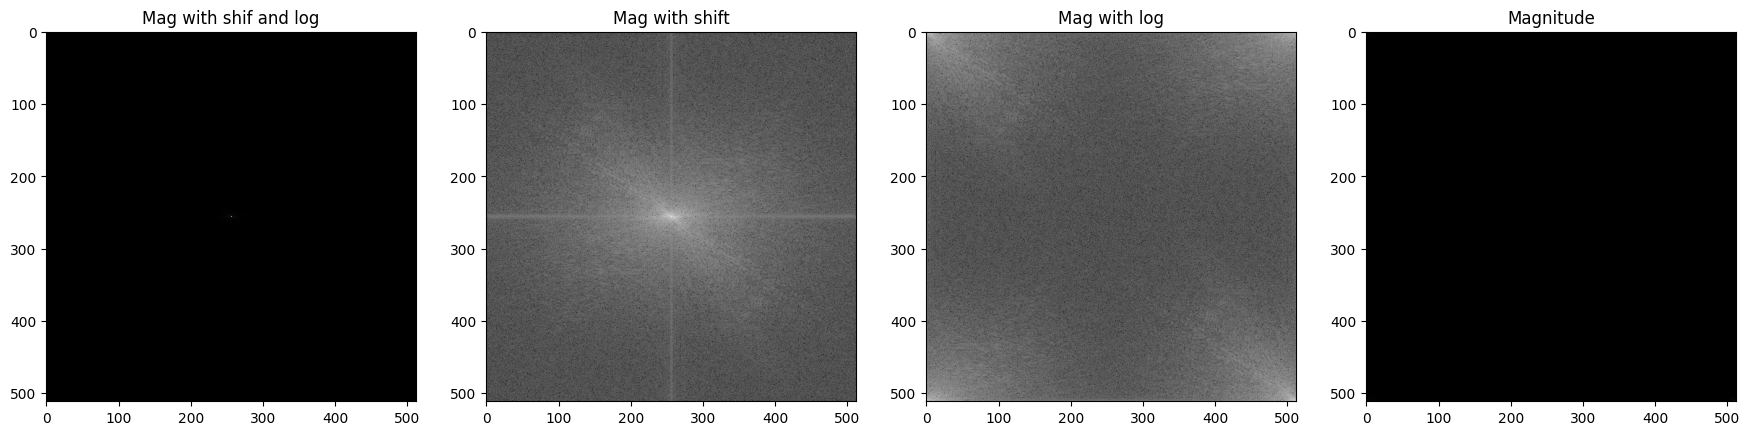

In [23]:
S,U = DFT(lena)
lena_log = log_DFT(S,U)

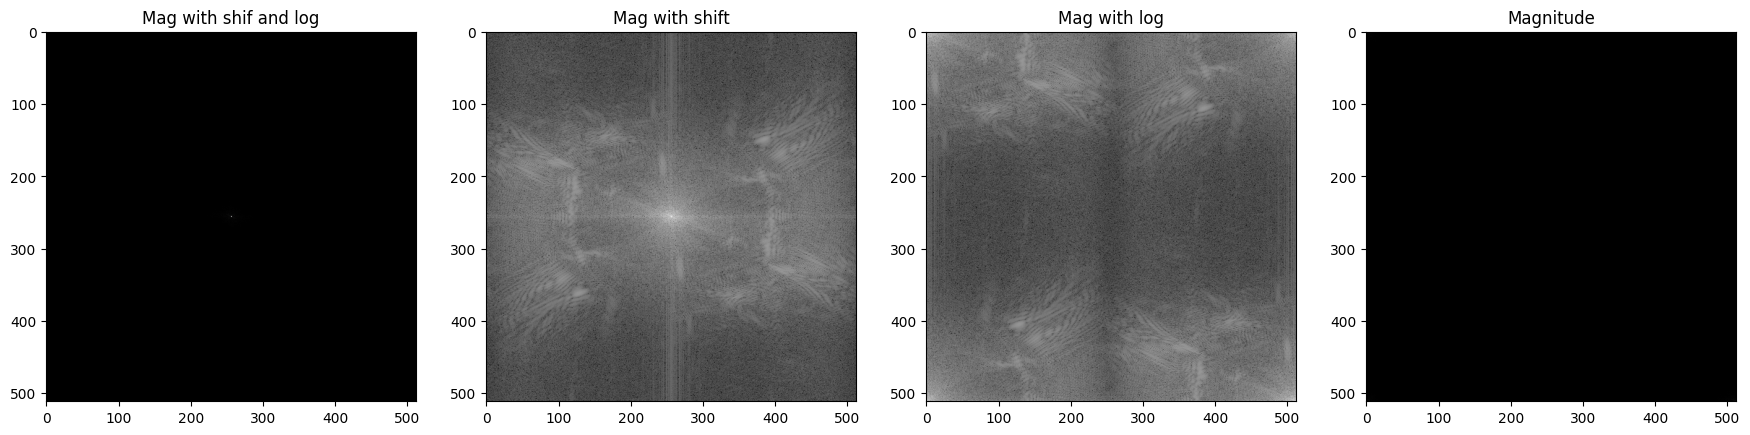

In [24]:
barbara = cv2.imread('Barbara.bmp', cv2.IMREAD_GRAYSCALE)

S,U = DFT(barbara)
barbara_log = log_DFT(S,U)

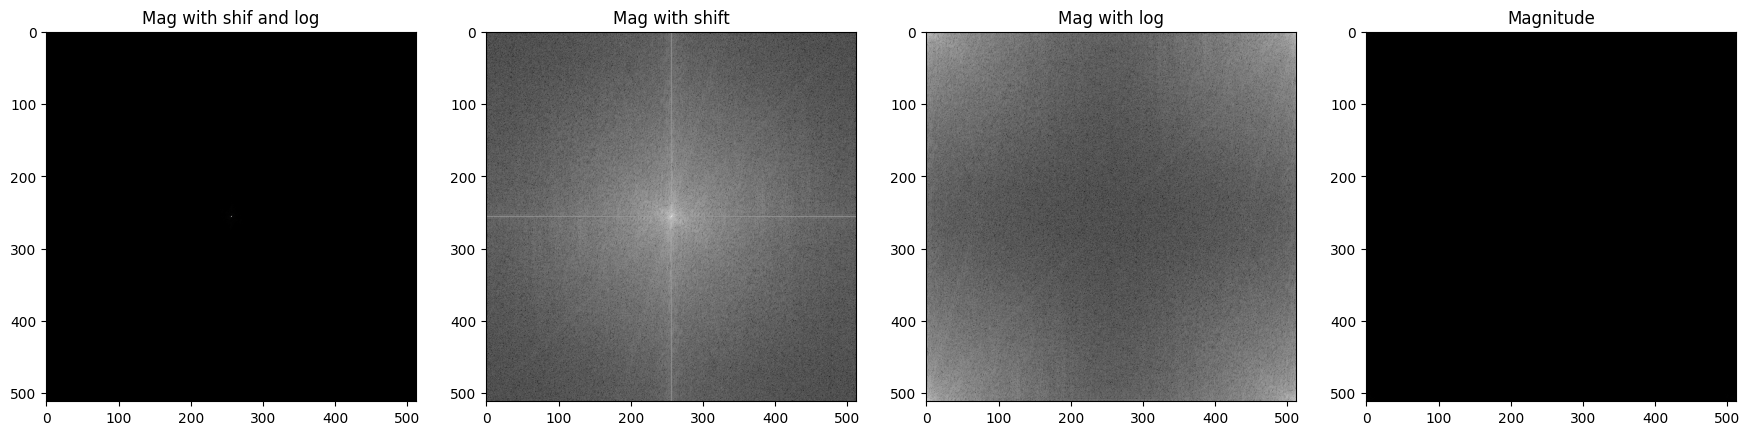

In [25]:
f16 = cv2.imread('F16.bmp', cv2.IMREAD_GRAYSCALE)

S,U = DFT(f16)
f16_log = log_DFT(S,U)

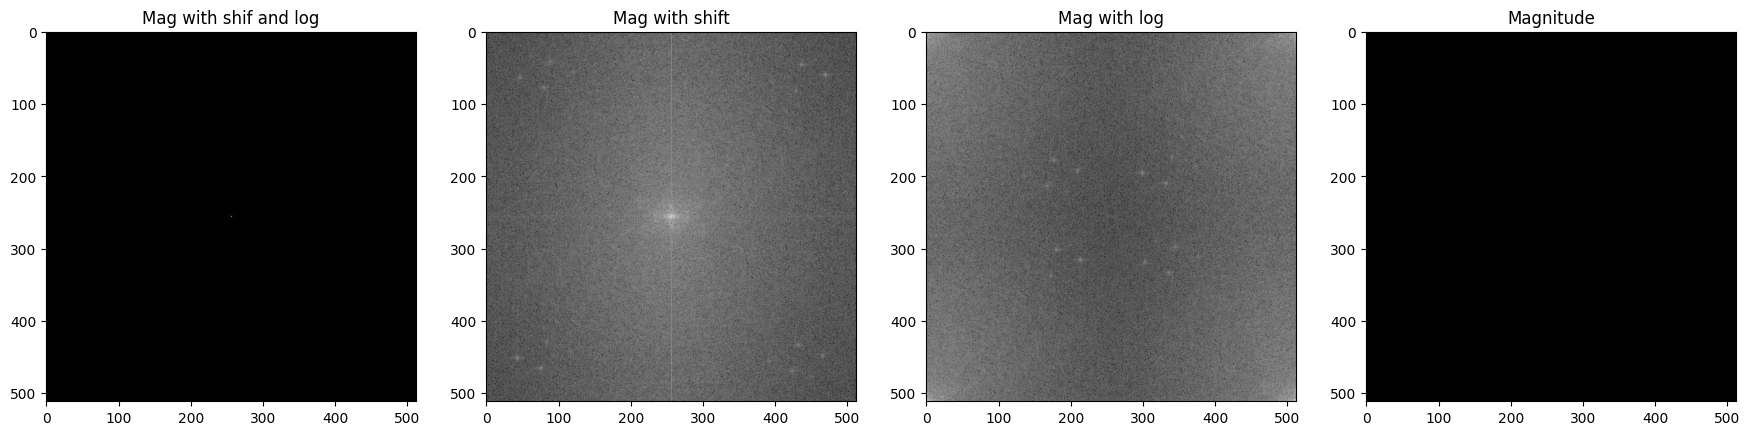

In [26]:
baboon = cv2.imread('Baboon.bmp', cv2.IMREAD_GRAYSCALE)

S,U = DFT(baboon)
baboon_log = log_DFT(S,U)

## practice 4.2.2

In [27]:
barbara

filter

filter

In [28]:
def a_filter(dft, T):
    N = dft.shape[0]
    low_pass = np.copy(dft)
    low_pass[int(T * N):int((1 - T) * N), int(T * N):int((1 - T) * N)] = 0
    return low_pass

In [29]:
def b_filter(dft, T):
    N = dft.shape[0]
    band_stop = np.copy(dft)
    band_stop[:int(T * N), :int(T * N)] = 0
    band_stop[:int(T * N), int((1 - T) * N):] = 0
    band_stop[int((1 - T) * N):, :int(T * N)] = 0
    band_stop[int((1 - T) * N):, int((1 - T) * N):] = 0
    return band_stop

In [30]:
def reverse_image(filtered_dft):
    filtered_img = np.abs(inverse_fourier_transform(filtered_dft))
    return filtered_img

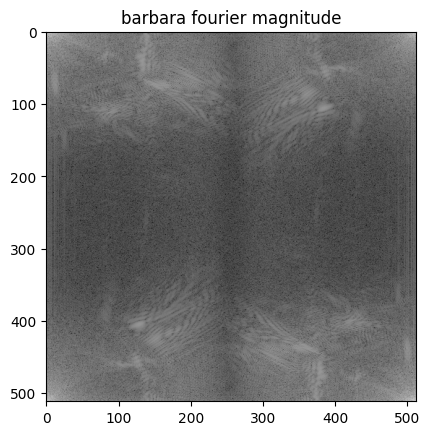

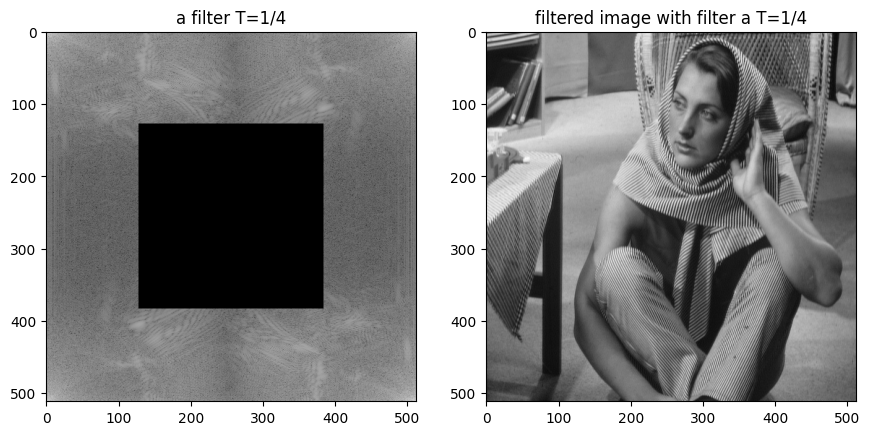

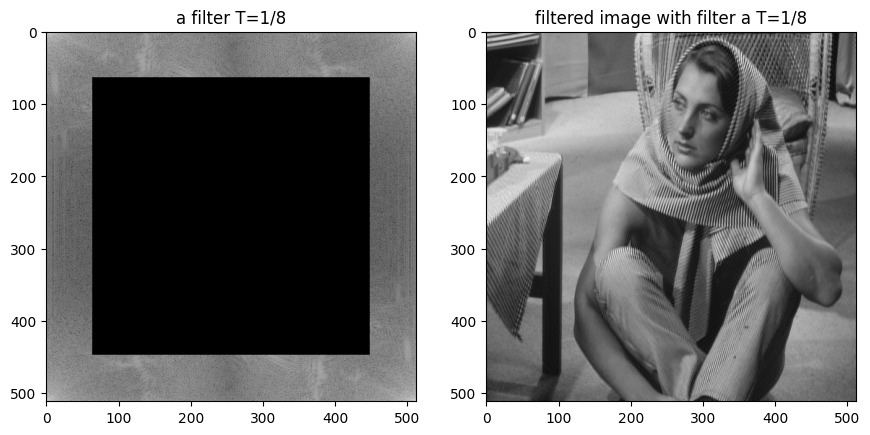

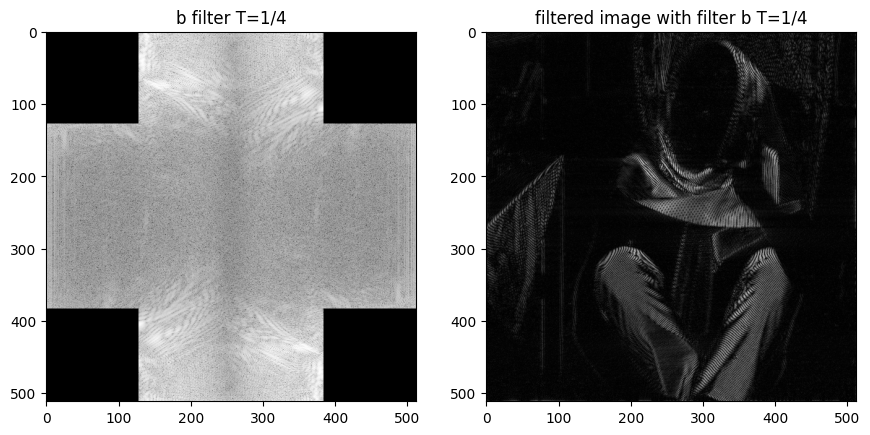

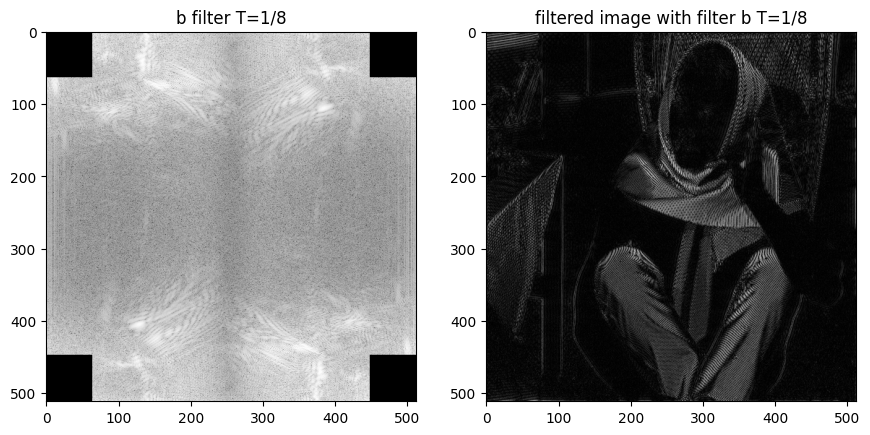

In [31]:
# Load the grayscale Barbara image
dft = fourier_transform(barbara, False)
plot_image(fourier_magnitude(dft, True), 1, 'barbara fourier magnitude')
plt.show()

# Filter the image using a filter with T = 1/4
filtered_img_a_0_5 = a_filter(dft, T=1/4)
reverse_img_a_0_5 = reverse_image(filtered_img_a_0_5)

# Filter the image using a filter with T = 1/8
filtered_img_a_0_25 = a_filter(dft, T=1/8)
reverse_img_a_0_25 = reverse_image(filtered_img_a_0_25)

# Filter the image using b filter with T = 1/4
filtered_img_b_0_5 = b_filter(dft, T=1/4)
reverse_img_b_0_5 = reverse_image(filtered_img_b_0_5)

# Filter the image using b filter with T = 1/8
filtered_img_b_0_25 = b_filter(dft, T=1/8)
reverse_img_b_0_25 = reverse_image(filtered_img_b_0_25)

# Plot the filtered images
plot_image(fourier_magnitude(filtered_img_a_0_5,True), 1, 'a filter T=1/4')
plot_image(reverse_img_a_0_5, 2, 'filtered image with filter a T=1/4')
plt.show()

plot_image(fourier_magnitude(filtered_img_a_0_25,True), 1, 'a filter T=1/8')
plot_image(reverse_img_a_0_25, 2, 'filtered image with filter a T=1/8')
plt.show()

plot_image(fourier_magnitude(filtered_img_b_0_5,True), 1, 'b filter T=1/4')
plot_image(reverse_img_b_0_5, 2, 'filtered image with filter b T=1/4')
plt.show()

plot_image(fourier_magnitude(filtered_img_b_0_25,True), 1, 'b filter T=1/8')
plot_image(reverse_img_b_0_25, 2, 'filtered image with filter b T=1/8')
plt.show()
